#Original data (2,700 images)

In [ ]:
!gdown 1BSNitrOeiIScOj13KIzeeSM2YQvBHerK

Downloading...
From: https://drive.google.com/uc?id=1BSNitrOeiIScOj13KIzeeSM2YQvBHerK
To: /content/training_data.zip
100% 171M/171M [00:02<00:00, 69.7MB/s]


In [ ]:
!unzip -q '/content/training_data.zip' -d '/content/'

In [ ]:
import os
import cv2
import numpy as np

root_dir = '/content/training_data'

img_lst = [] #storage of object image
label_lst = [] #storage of class name

label_dir = os.path.join(root_dir, 'annotations')
img_dir = os.path.join(root_dir, 'images')

label_list = os.listdir(label_dir)
for label in label_list:
  label_path = os.path.join(label_dir, label)
  with open(label_path) as f:
    lines = f.readlines()
    for address in lines:
      label_lst.append(address.split('\t')[1].replace('\n',''))
      img_path = os.path.join(img_dir, address.split('\t')[0])
      img_lst.append(cv2.imread(img_path))

print(len(img_lst))
len(label_lst) == len(img_lst)

2700


True

Image:


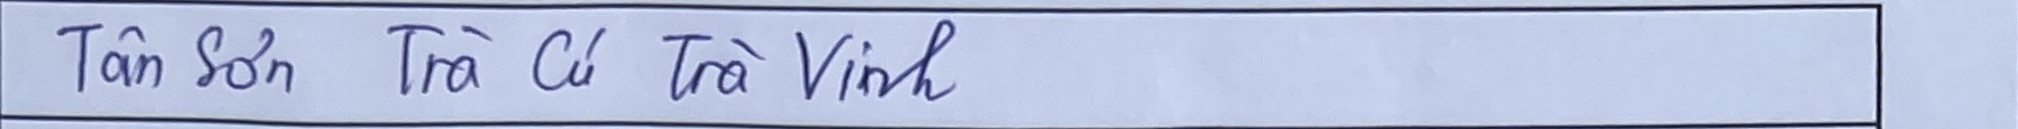

Label: Tân Sơn Trà Cú Trà Vinh
>====<
Image:


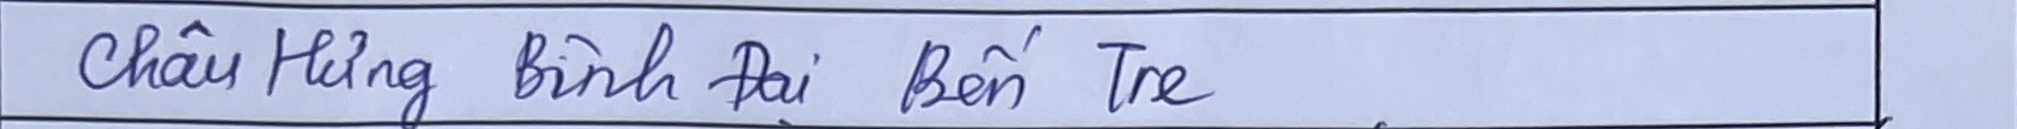

Label: Châu Hưng Bình Đại Bến Tre
>====<
Image:


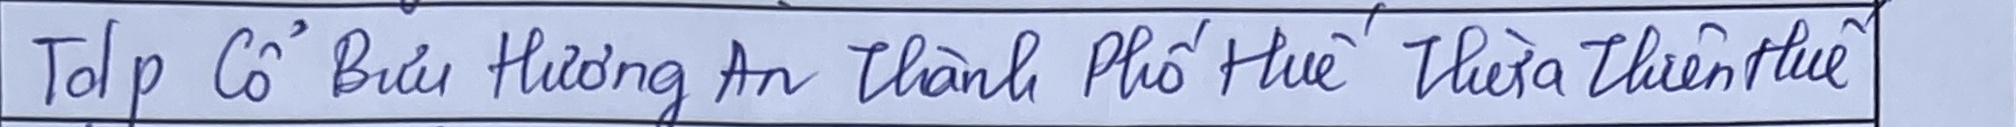

Label: Tdp Cổ Bưu Hương An Thành Phố Huế Thừa Thiên Huế
>====<
Image:


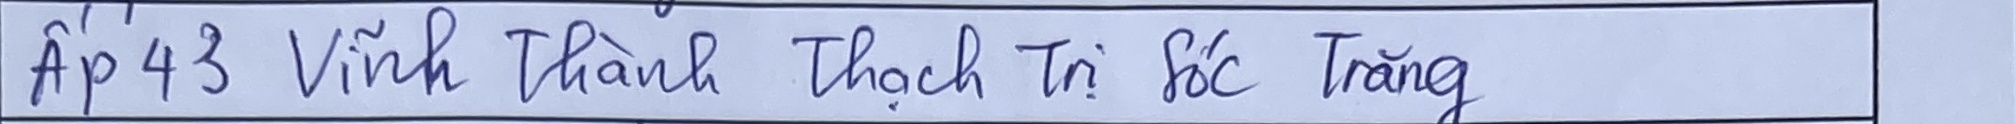

Label: Ấp 43 Vĩnh Thành Thạnh Trị Sóc Trăng
>====<
Image:


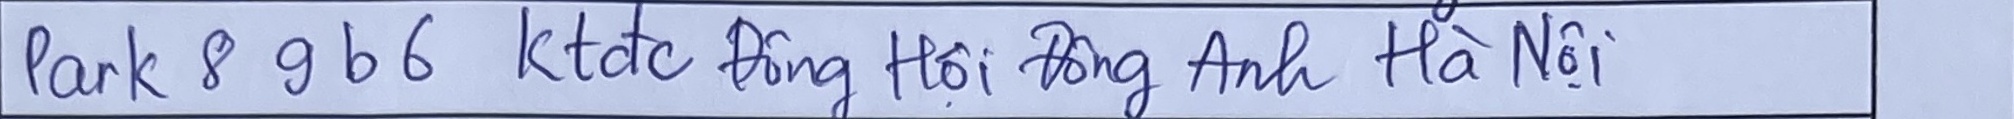

Label: Park 8 9b6 Ktđc Đông Hội Đông Anh Hà Nội
>====<


In [ ]:
#Take a look
from google.colab.patches import cv2_imshow
for i in range(5):
  print('Image:')
  cv2_imshow(img_lst[i])
  print('Label:', label_lst[i])
  print('>====<')

#Data preprocessing (Sentence detection)

In [ ]:
import cv2
import numpy as np
def remove_background(image):
  gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  # Remove horizontal lines
  horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40,1))
  remove_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=1)
  cnts = cv2.findContours(remove_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cnts = cnts[0] if len(cnts) == 2 else cnts[1]
  for c in cnts:
    cv2.drawContours(thresh, [c], -1, (0,255,255), 5)
  # Remove vertical lines
  vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,40))
  remove_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
  cnts = cv2.findContours(remove_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cnts = cnts[0] if len(cnts) == 2 else cnts[1]
  for c in cnts:
    cv2.drawContours(thresh, [c], -1, (0,255,255), 15)
  contours,hierarchy = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
  bounding_boxes = []
  for cnt in contours:
    if cv2.contourArea(cnt)>50:
      [x,y,w,h] = cv2.boundingRect(cnt)
      if (x, y) != (0, 0) and (y+h-y)/image.shape[0] > 0.18 and (x+w-x)/image.shape[1] > 0.01 and (x+w-x)/(y+h-y) > 0.15:
        bounding_boxes.append([x,y,x+w,y+h])
  if np.array(bounding_boxes).size != 0:
    #xxmin = min(np.array(bounding_boxes)[:, 0])
    yymin = min(np.array(bounding_boxes)[:, 1])
    xxmax = max(np.array(bounding_boxes)[:, 2])
    yymax = max(np.array(bounding_boxes)[:, 3])
    #xxmin = xxmin - 25 if xxmin - 25 > 0 else xxmin
    xxmax = xxmax + 40 if xxmax + 40 < image.shape[1] else xxmax
    yymin = yymin - 5 if yymin - 5 > 0 else yymin
    yymax = yymax + 5 if yymax + 5 < image.shape[0] else yymax
    return image[yymin:yymax, 0:xxmax]
  else:
    return image

In [ ]:
processed_img_lst = []
for img in img_lst[470:540]:
  new_img = remove_background(img)
  processed_img_lst.append(new_img)
  #Display result
  cv2_imshow(new_img)

Output hidden; open in https://colab.research.google.com to view.

#Data preprocessing (Sentence detection + Apply threshold)

In [ ]:
import cv2
import numpy as np
def remove_background_thr(image):
  gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  # Remove horizontal lines
  horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40,1))
  remove_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=1)
  cnts = cv2.findContours(remove_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cnts = cnts[0] if len(cnts) == 2 else cnts[1]
  for c in cnts:
    cv2.drawContours(thresh, [c], -1, (0,255,255), 5)
  # Remove vertical lines
  vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,40))
  remove_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
  cnts = cv2.findContours(remove_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cnts = cnts[0] if len(cnts) == 2 else cnts[1]
  for c in cnts:
    cv2.drawContours(thresh, [c], -1, (0,255,255), 15)
  contours,hierarchy = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
  bounding_boxes = []
  for cnt in contours:
    if cv2.contourArea(cnt)>50:
      [x,y,w,h] = cv2.boundingRect(cnt)
      if (x, y) != (0, 0) and (y+h-y)/image.shape[0] > 0.18 and (x+w-x)/image.shape[1] > 0.01 and (x+w-x)/(y+h-y) > 0.15:
        bounding_boxes.append([x,y,x+w,y+h])
  new_thresh = np.where(thresh == 255, 0, 255)
  if np.array(bounding_boxes).size != 0:
    xxmin = min(np.array(bounding_boxes)[:, 0])
    yymin = min(np.array(bounding_boxes)[:, 1])
    xxmax = max(np.array(bounding_boxes)[:, 2])
    yymax = max(np.array(bounding_boxes)[:, 3])
    xxmin = xxmin - 25 if xxmin - 25 > 0 else 0
    xxmax = xxmax + 40 if xxmax + 40 < image.shape[1] else xxmax
    yymin = yymin - 5 if yymin - 5 > 0 else yymin
    yymax = yymax + 5 if yymax + 5 < image.shape[0] else yymax
    return new_thresh[yymin:yymax, xxmin:xxmax]
  else:
    return new_thresh

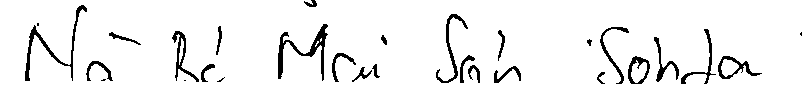

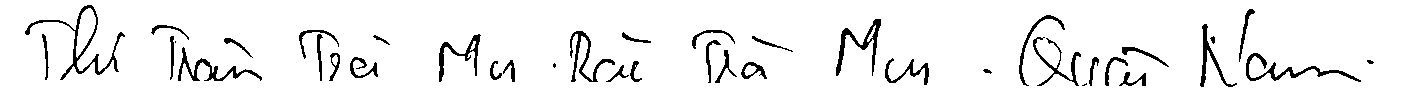

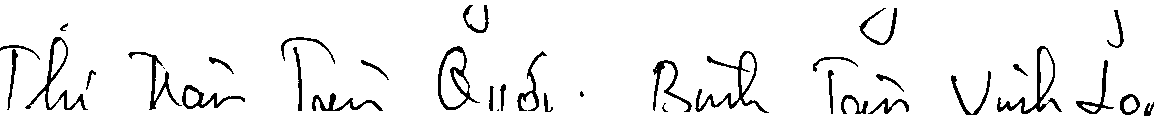

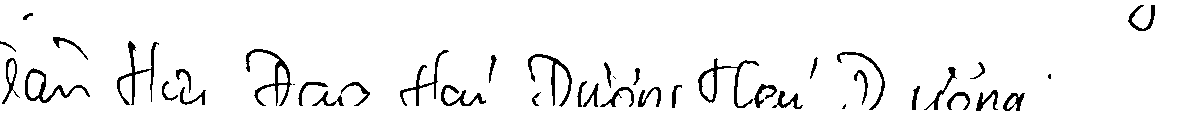

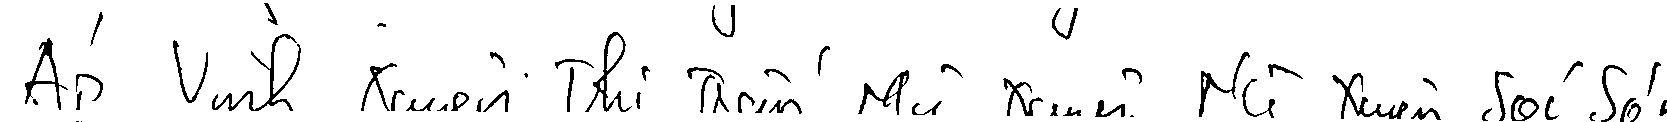

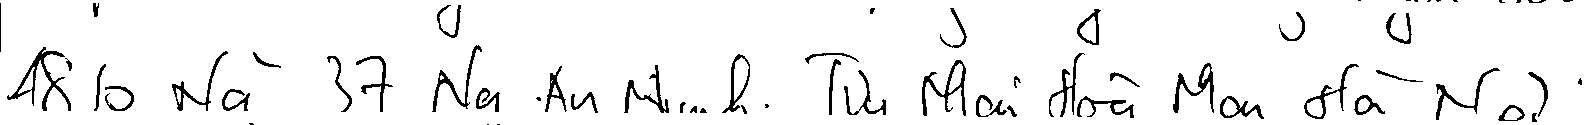

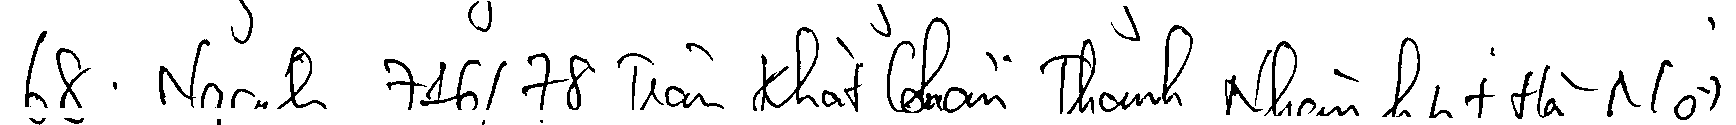

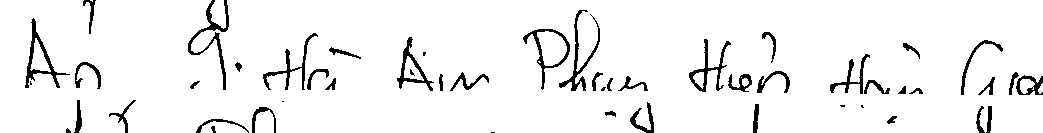

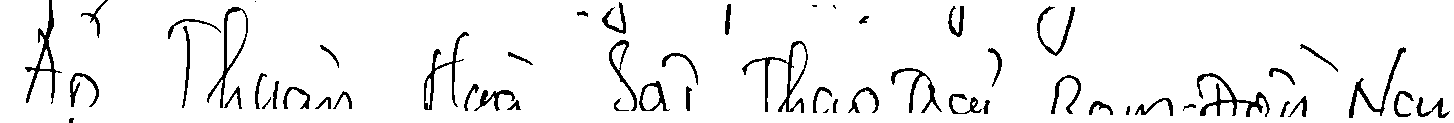

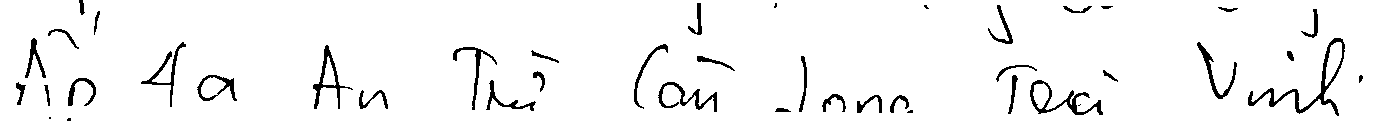

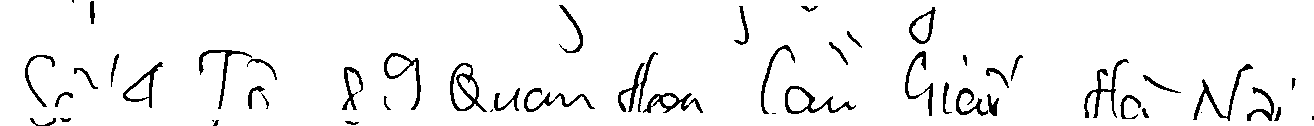

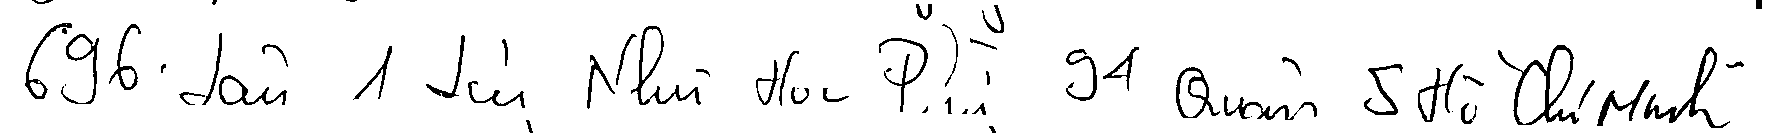

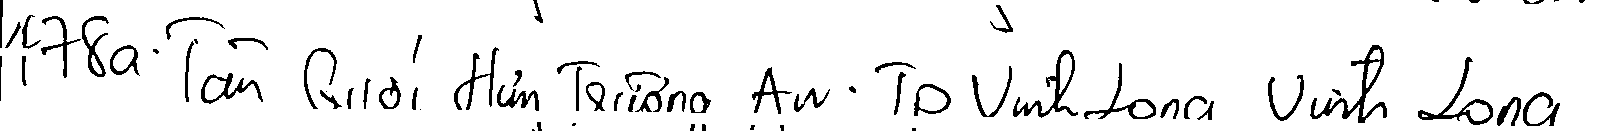

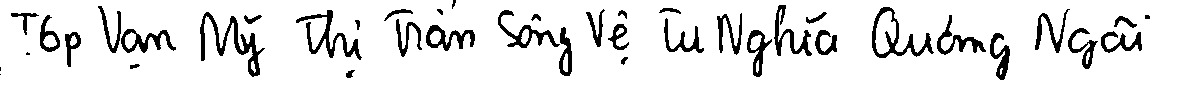

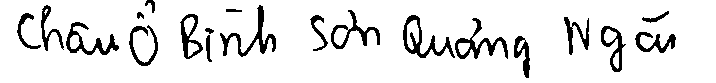

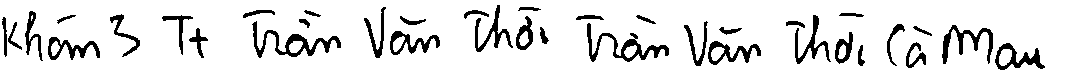

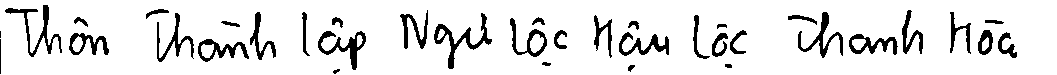

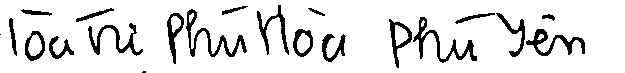

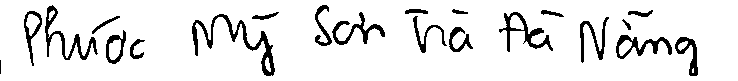

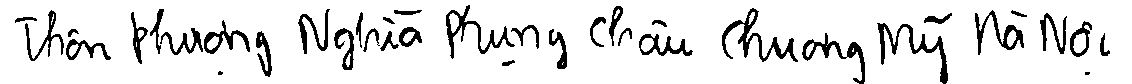

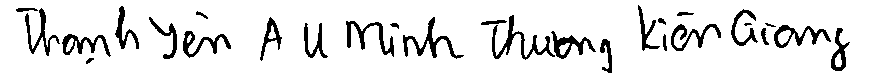

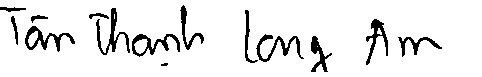

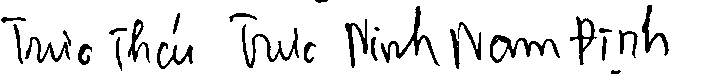

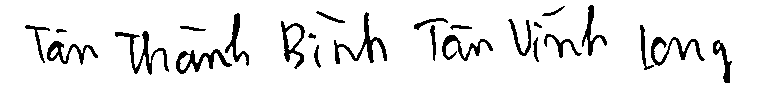

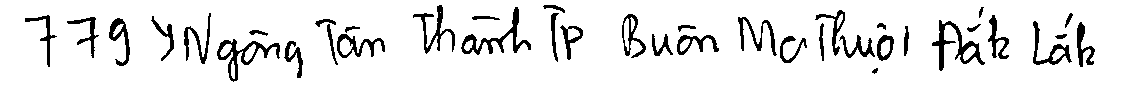

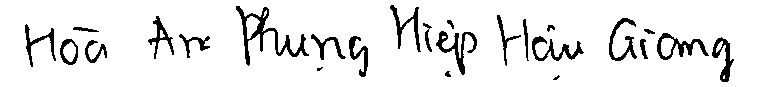

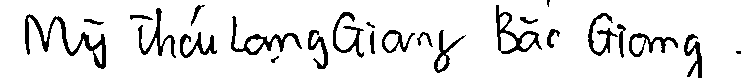

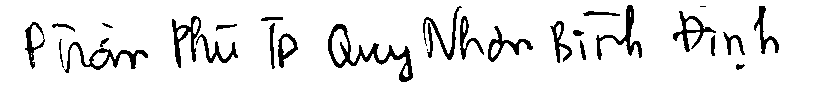

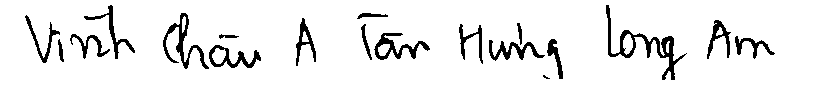

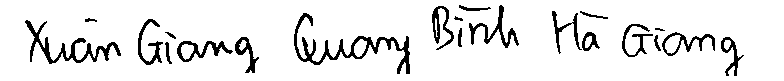

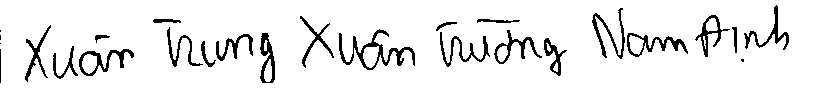

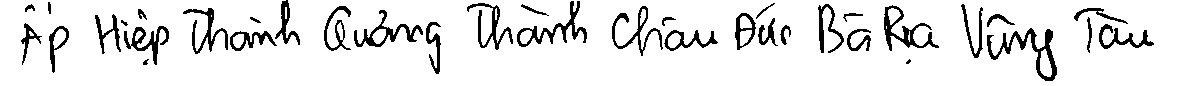

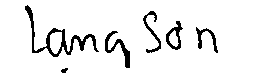

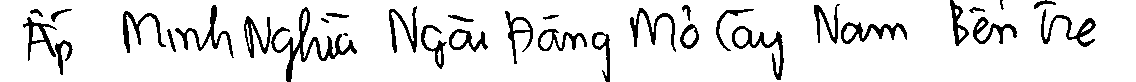

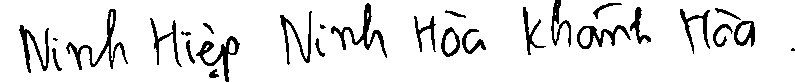

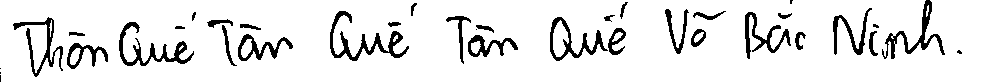

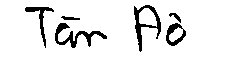

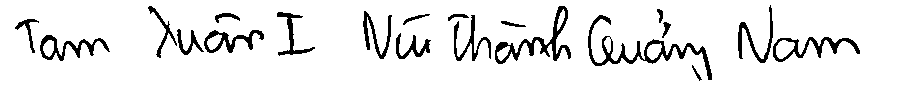

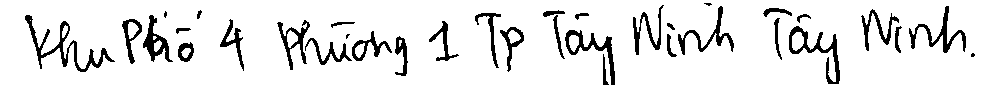

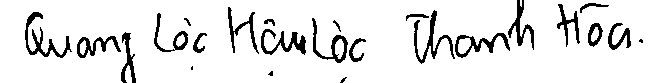

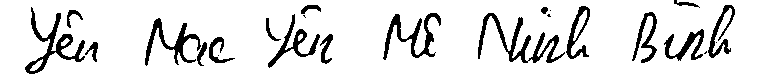

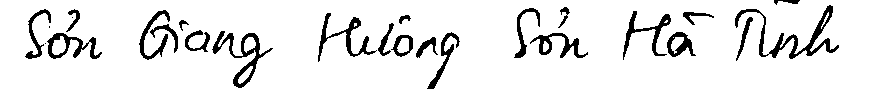

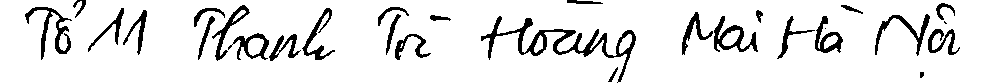

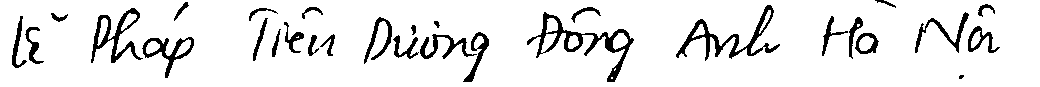

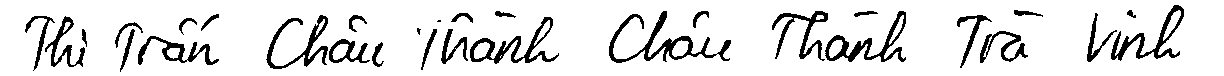

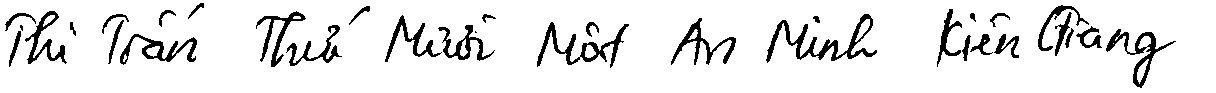

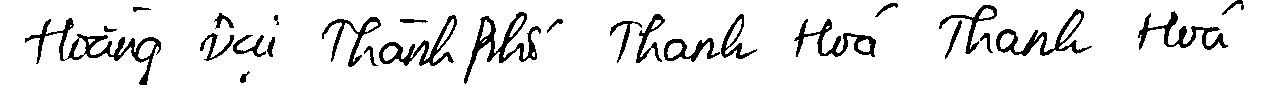

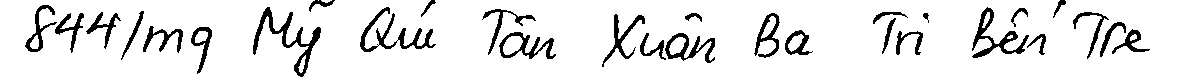

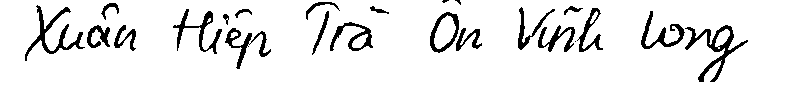

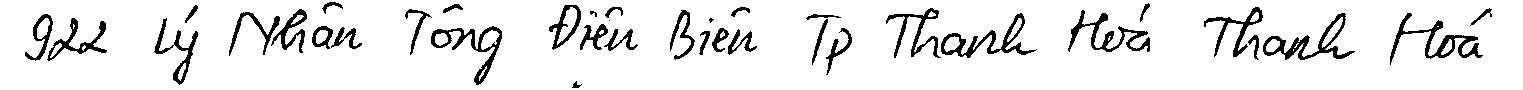

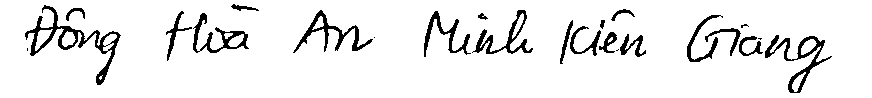

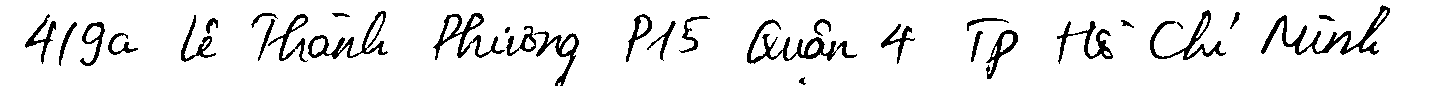

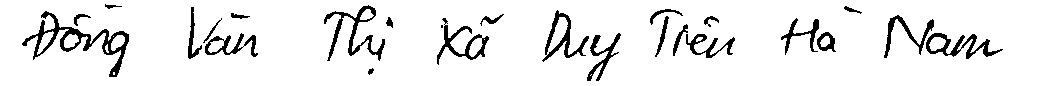

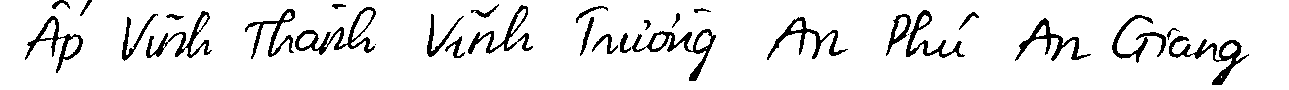

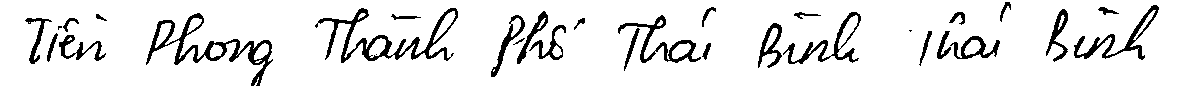

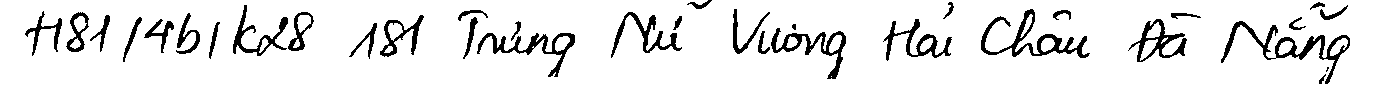

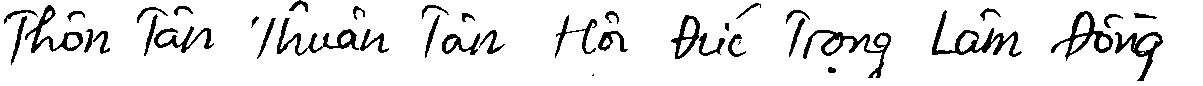

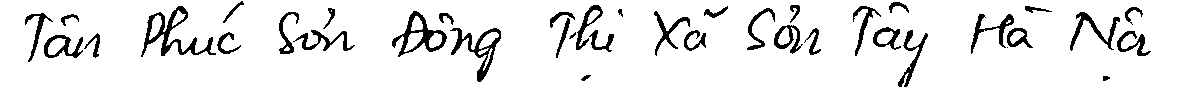

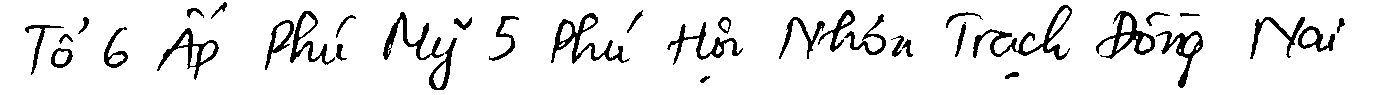

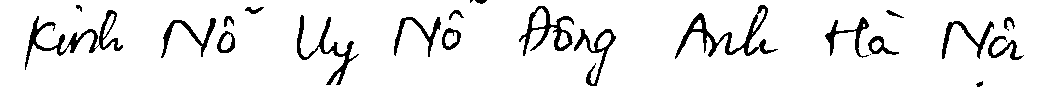

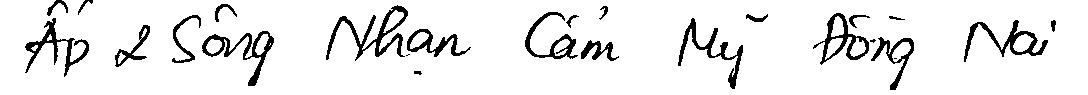

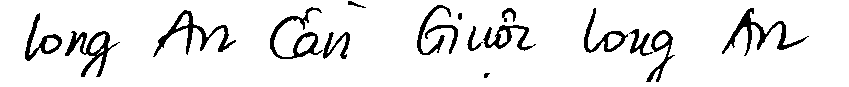

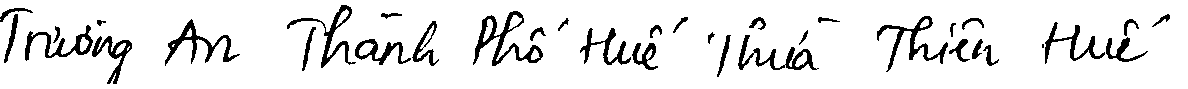

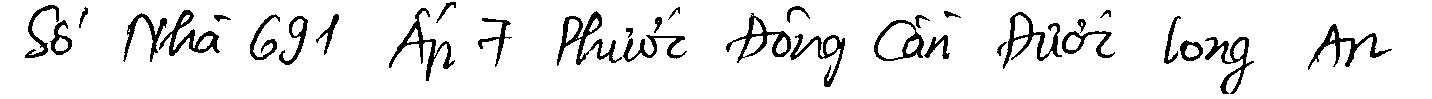

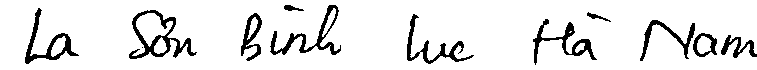

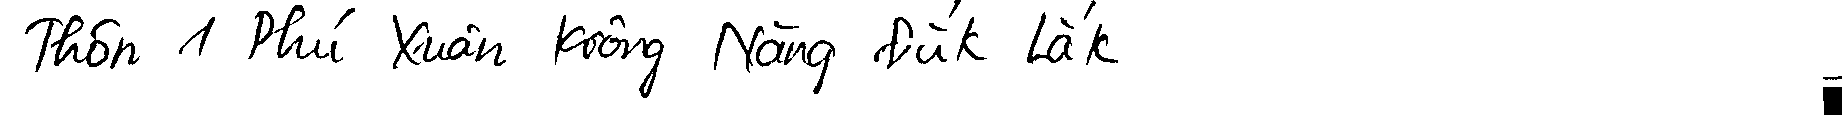

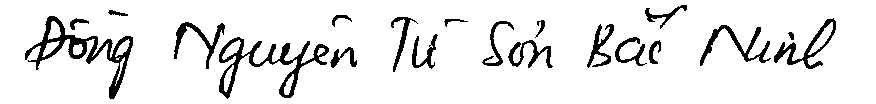

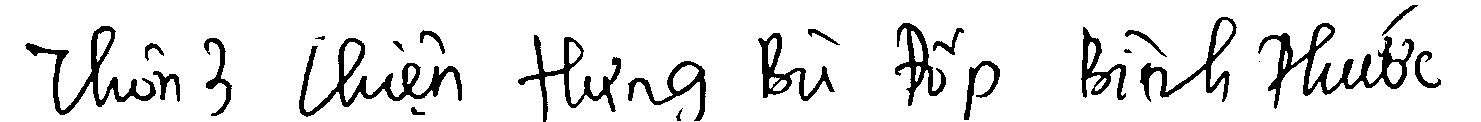

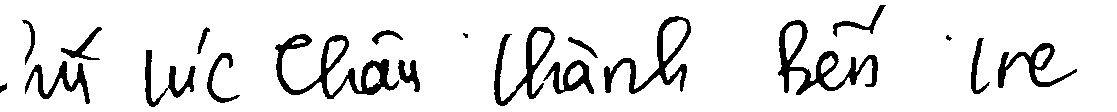

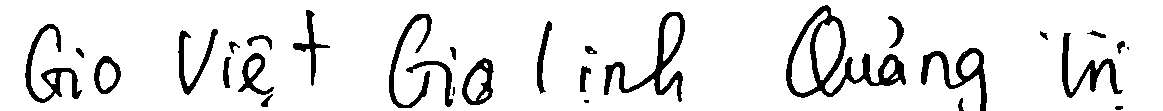

In [ ]:
processed_img_lst = []
for img in img_lst[770:840]:
  new_img = remove_background_thr(img)
  processed_img_lst.append(new_img)
  #Display result
  cv2_imshow(new_img)

#Image augmentation (48,600 images)

In [ ]:
import albumentations as A
import cv2
def augment_random_crop(image):
    aug = A.RandomCrop(height=image.shape[0]*8//10, width=image.shape[1]*8//10, p=1)
    image = aug(image=image)['image']
    return image
def augment_blur(image):
    aug = A.Blur(p=1)
    image = aug(image=image)['image']
    return image
def augment_crop(image, percent=0.2):
    original_image = image.copy()
    height, width = image.shape[:2]
    min_dim = min(height, width*7/10)
    crop_size = np.random.randint(1, min_dim)
    top = np.random.randint(0, height - crop_size)
    left = np.random.randint(0, width - crop_size)
    mask = np.zeros_like(image)
    mask[top:top + crop_size, left:left + crop_size] = 1
    result = original_image * (1 - mask)
    return result

In [ ]:
import os
import cv2
import numpy as np
import time

root_dir = '/content/training_data'
label_dir = os.path.join(root_dir, 'annotations')
img_dir = os.path.join(root_dir, 'images')

#Setting up space for storage
ttd_root_dir = "/content"
root_folder = 'OCR_new_dataset'
label_list = os.listdir(label_dir)
total_paths = []

for label in label_list:
  label_path = os.path.join(label_dir, label)
  with open(label_path) as f:
    lines = f.readlines()
    label_dict = {}
    for address in lines:
      #read label
      label = address.split('\t')[1].replace('\n','')
      #read image
      img_name = address.split('\t')[0].replace('.jpg','').replace('/', '_')
      img_path = os.path.join(img_dir, address.split('\t')[0])
      img = cv2.imread(img_path)
      #data augmentation
      img_path_list = []
      #original img
      org_img = img
      img_path_list.append(os.path.join(root_folder, img_name+'_org_img.png'))
      cv2.imwrite(os.path.join(ttd_root_dir,img_path_list[-1]), org_img)
      #augmentation
      crop_org_img = augment_random_crop(org_img)
      img_path_list.append(os.path.join(root_folder, img_name+'_crop_org_img.png'))
      cv2.imwrite(os.path.join(ttd_root_dir,img_path_list[-1]), crop_org_img)
      rdcrop_org_img = augment_crop(org_img)
      img_path_list.append(os.path.join(root_folder, img_name+'_rdcrop_org_img.png'))
      cv2.imwrite(os.path.join(ttd_root_dir,img_path_list[-1]), rdcrop_org_img)
      blur_org_img = augment_blur(org_img)
      img_path_list.append(os.path.join(root_folder, img_name+'_blur_org_img.png'))
      cv2.imwrite(os.path.join(ttd_root_dir,img_path_list[-1]), blur_org_img)
      rdcrop1_org_img = augment_crop(org_img)
      img_path_list.append(os.path.join(root_folder, img_name+'_rdcrop1_org_img.png'))
      cv2.imwrite(os.path.join(ttd_root_dir,img_path_list[-1]), rdcrop1_org_img)
      crop1_org_img = augment_random_crop(org_img)
      img_path_list.append(os.path.join(root_folder, img_name+'_crop1_org_img.png'))
      cv2.imwrite(os.path.join(ttd_root_dir,img_path_list[-1]), crop1_org_img)
      #remove background img
      rmbg_img = remove_background(img)
      img_path_list.append(os.path.join(root_folder, img_name+'_rmbg_img.png'))
      cv2.imwrite(os.path.join(ttd_root_dir,img_path_list[-1]), rmbg_img)
      #augmentation
      crop_rmbg_img = augment_random_crop(rmbg_img)
      img_path_list.append(os.path.join(root_folder, img_name+'_crop_rmbg_img.png'))
      cv2.imwrite(os.path.join(ttd_root_dir,img_path_list[-1]), crop_rmbg_img)
      rdcrop_rmbg_img = augment_crop(rmbg_img)
      img_path_list.append(os.path.join(root_folder, img_name+'_rdcrop_rmbg_img.png'))
      cv2.imwrite(os.path.join(ttd_root_dir,img_path_list[-1]), rdcrop_rmbg_img)
      blur_rmbg_img = augment_blur(rmbg_img)
      img_path_list.append(os.path.join(root_folder, img_name+'_blur_rmbg_img.png'))
      cv2.imwrite(os.path.join(ttd_root_dir,img_path_list[-1]), blur_rmbg_img)
      rdcrop1_rmbg_img = augment_crop(rmbg_img)
      img_path_list.append(os.path.join(root_folder, img_name+'_rdcrop1_rmbg_img.png'))
      cv2.imwrite(os.path.join(ttd_root_dir,img_path_list[-1]), rdcrop1_rmbg_img)
      crop1_rmbg_img = augment_random_crop(rmbg_img)
      img_path_list.append(os.path.join(root_folder, img_name+'_crop1_rmbg_img.png'))
      cv2.imwrite(os.path.join(ttd_root_dir,img_path_list[-1]), crop1_rmbg_img)
      #remove background + threshold img
      rmbg_thr_img = remove_background_thr(img)
      img_path_list.append(os.path.join(root_folder, img_name+'_rmbg_thr_img.png'))
      cv2.imwrite(os.path.join(ttd_root_dir,img_path_list[-1]), rmbg_thr_img)
      #augmentation
      crop_rmbg_thr_img = augment_random_crop(rmbg_thr_img)
      img_path_list.append(os.path.join(root_folder, img_name+'_crop_rmbg_thr_img.png'))
      cv2.imwrite(os.path.join(ttd_root_dir,img_path_list[-1]), crop_rmbg_thr_img)
      rdcrop_rmbg_thr_img = augment_crop(rmbg_thr_img)
      img_path_list.append(os.path.join(root_folder, img_name+'_rdcrop_rmbg_thr_img.png'))
      cv2.imwrite(os.path.join(ttd_root_dir,img_path_list[-1]), rdcrop_rmbg_thr_img)
      blur_rmbg_thr_img = augment_blur(rmbg_thr_img)
      img_path_list.append(os.path.join(root_folder, img_name+'_blur_rmbg_thr_img.png'))
      cv2.imwrite(os.path.join(ttd_root_dir,img_path_list[-1]), blur_rmbg_thr_img)
      rdcrop1_rmbg_thr_img = augment_crop(rmbg_thr_img)
      img_path_list.append(os.path.join(root_folder, img_name+'_rdcrop1_rmbg_thr_img.png'))
      cv2.imwrite(os.path.join(ttd_root_dir,img_path_list[-1]), rdcrop1_rmbg_thr_img)
      crop1_rmbg_thr_img = augment_random_crop(rmbg_thr_img)
      img_path_list.append(os.path.join(root_folder, img_name+'_crop1_rmbg_thr_img.png'))
      cv2.imwrite(os.path.join(ttd_root_dir,img_path_list[-1]), crop1_rmbg_thr_img)
      #Store
      label_dict[label] = img_path_list
      total_paths.append(label_dict)
      print(f'finished: {label}, {len(img_path_list)}')

In [ ]:
with open('annotations.txt', 'w') as outfile:
  for label in total_paths:
    for k, l in label.items():
      for p in l:
        outfile.write(p +' \t '+k+'\n')

#Image generation (20,000 images)

In [2]:
!pip -q install trdg

Reason for being yanked: Doesn't work with Python 2


In [ ]:
import os
from google.colab import files
from google.colab.patches import cv2_imshow

In [4]:
#Load font
!gdown 1duw5WPGv6H77T6MRFjNFvaLlvsQPkpPS
!unzip vn_hw_font.zip

Downloading...
From: https://drive.google.com/uc?id=1duw5WPGv6H77T6MRFjNFvaLlvsQPkpPS
To: /content/vn_hw_font.zip
100% 166k/166k [00:00<00:00, 42.3MB/s]
Archive:  vn_hw_font.zip
   creating: vn_hw_font/
  inflating: vn_hw_font/CantWriteQuicklyInWinter-DpVE.ttf  
  inflating: vn_hw_font/HaikusScriptV08Upgrade-B57w.ttf  
  inflating: vn_hw_font/HmtRegular-WRrv.ttf  
  inflating: vn_hw_font/SimplesnailsVer40-6Lpx.ttf  


In [ ]:
#Load label
with open('all_label.txt','w') as f:
    for label in label_lst:
        f.write(label)
        if label !=label_lst[-1]:
            f.write('\n')

In [ ]:
!trdg -c 20000 -k 3 -rk -rbl --margins 0,0,0,0 -i all_label.txt -fd vn_hw_font -f 100 -b 2 -d 3 -na 2 -e png
#!rm -rf out

In [ ]:
#Take a look
directory_path = './out'
for filename in os.listdir(directory_path)[:10]:
    if filename.endswith(".jpg") or filename.endswith(".png"):
        file_path = os.path.join(directory_path, filename)
        image = cv2.imread(file_path)
        cv2_imshow(image)

In [ ]:
#Download new dataset
!zip -r /content/file.zip /content/out
files.download("/content/file.zip")